# Calories Burnt Prediction using Machine Learning
*   Random Forest Regression
*   Decision tree regression
*   XGBoost Regressor

---


**Data Collection and Processing**

In [42]:
import numpy as np
import pandas as pd

In [43]:
# loading the data from csv files to Pandas DataFrames
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [44]:

exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [45]:

calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [46]:
# merge the two dataframes
data = pd.merge(exercise, calories, on='User_ID')

In [47]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0



1. User_ID : The ID of the person which is unique.
2. Gender : Gender of the person.
3. Age : Age of the person.
4. Height : Height of the person in  cm .
5. Weight : Weight of the person in  kg .
6. Duration : Duration of the person's exercise/activity.
7. Heart_Rate : Heart rate per  min  of the person.
8. Body_Temp : Body temperature of the person in  C∘ .
9. Calories : Calories burned in kilo calories.



**Display information and basic statistics**

In [48]:
# Display general information about the dataset
print("Dataset Information:\n")
data.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [49]:
# number of row and columns
print("number of rows: ",data.shape[0])
print("number of columns: ",data.shape[1])

number of rows:  15000
number of columns:  9


In [50]:
# checking for missing values
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [51]:
#checking for duplicated rows
data.duplicated().any()

False

In [52]:
# Display basic statistics for numerical columns
print("Basic Statistics for Numerical Columns:\n")
data.describe()

Basic Statistics for Numerical Columns:



,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Data Analysis**

In [53]:
import seaborn as sns
sns.set_theme()

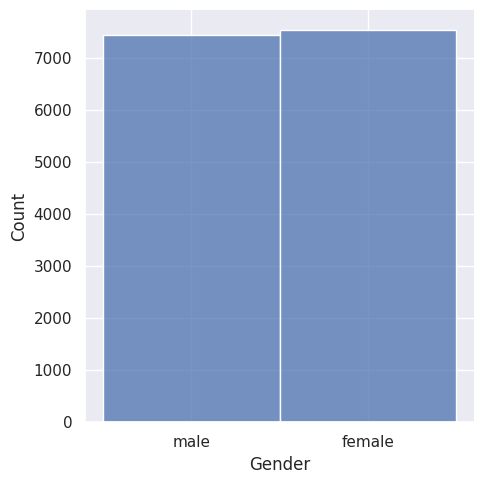

In [54]:
# finding the distribution of "gender" column
sns.displot(data['Gender'])

<Axes: xlabel='Age', ylabel='Count'>

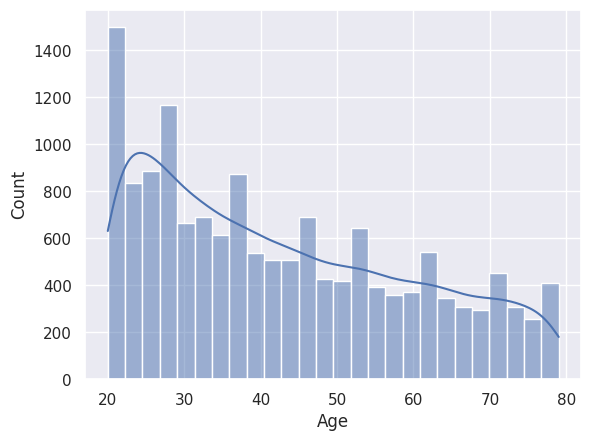

In [55]:
# finding the distribution of "Age" column
sns.histplot(data['Age'],kde = 'true')

<Axes: xlabel='Height', ylabel='Count'>

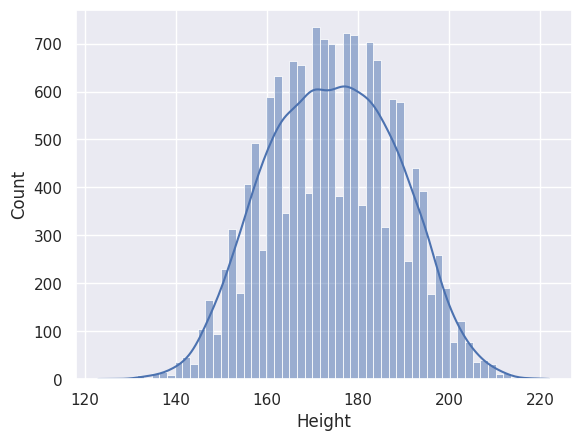

In [56]:
# finding the distribution of "Height" column
sns.histplot(data['Height'],kde = 'true')

<Axes: xlabel='Weight', ylabel='Count'>

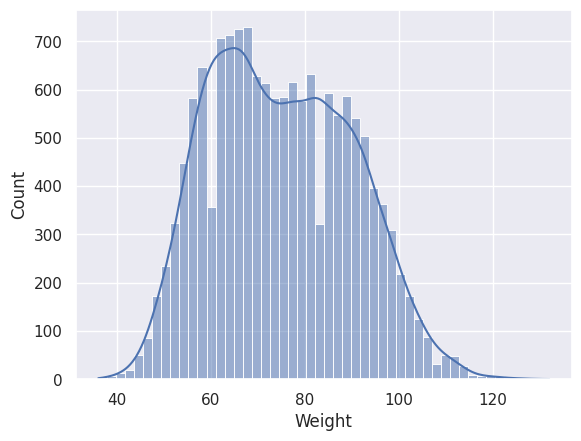

In [57]:
# finding the distribution of "Weight" column
sns.histplot(data['Weight'],kde = 'true')

<Axes: xlabel='Duration', ylabel='Count'>

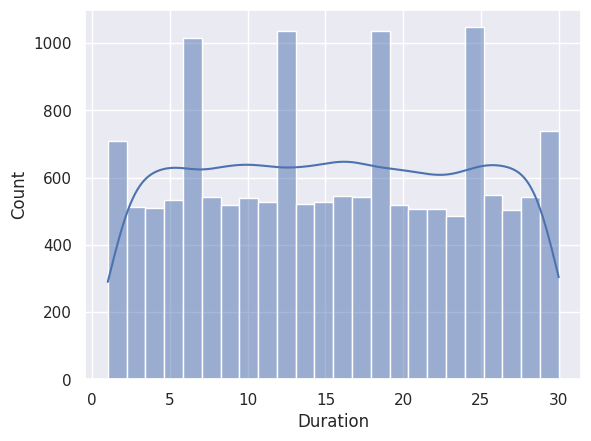

In [58]:
# finding the distribution of "Duration" column
sns.histplot(data['Duration'],kde = 'true')

<Axes: xlabel='Heart_Rate', ylabel='Count'>

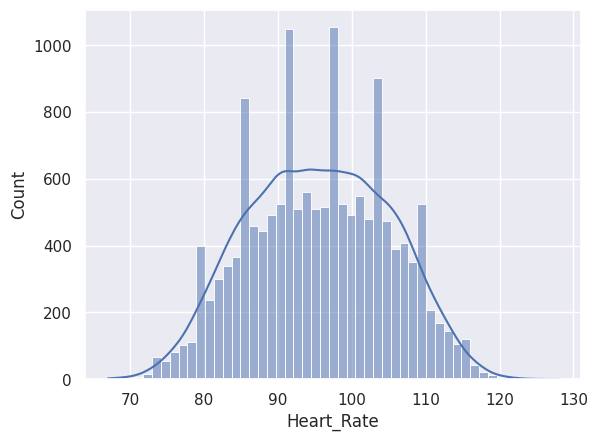

In [59]:
# finding the distribution of "Heart_Rate" column
sns.histplot(data['Heart_Rate'],kde = 'true')

<Axes: xlabel='Body_Temp', ylabel='Count'>

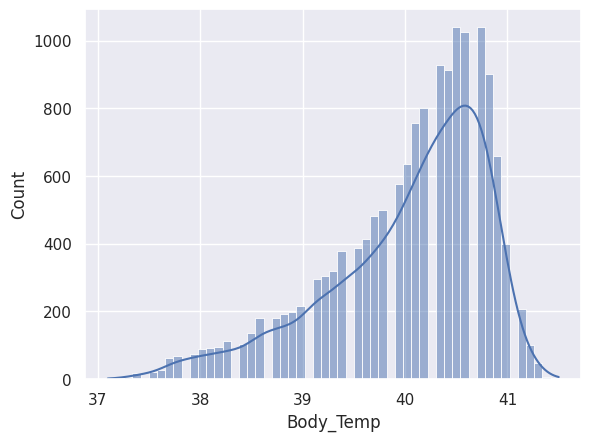

In [60]:
# finding the distribution of "Body_Temp" column
sns.histplot(data['Body_Temp'],kde = 'true')

<Axes: xlabel='Calories', ylabel='Count'>

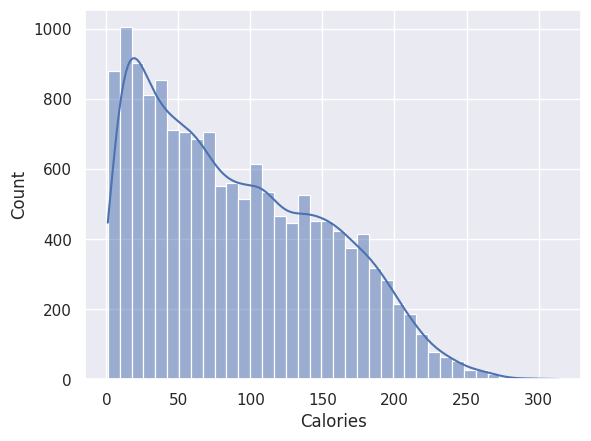

In [61]:
# finding the distribution of "Calories" column
sns.histplot(data['Calories'],kde = 'true')

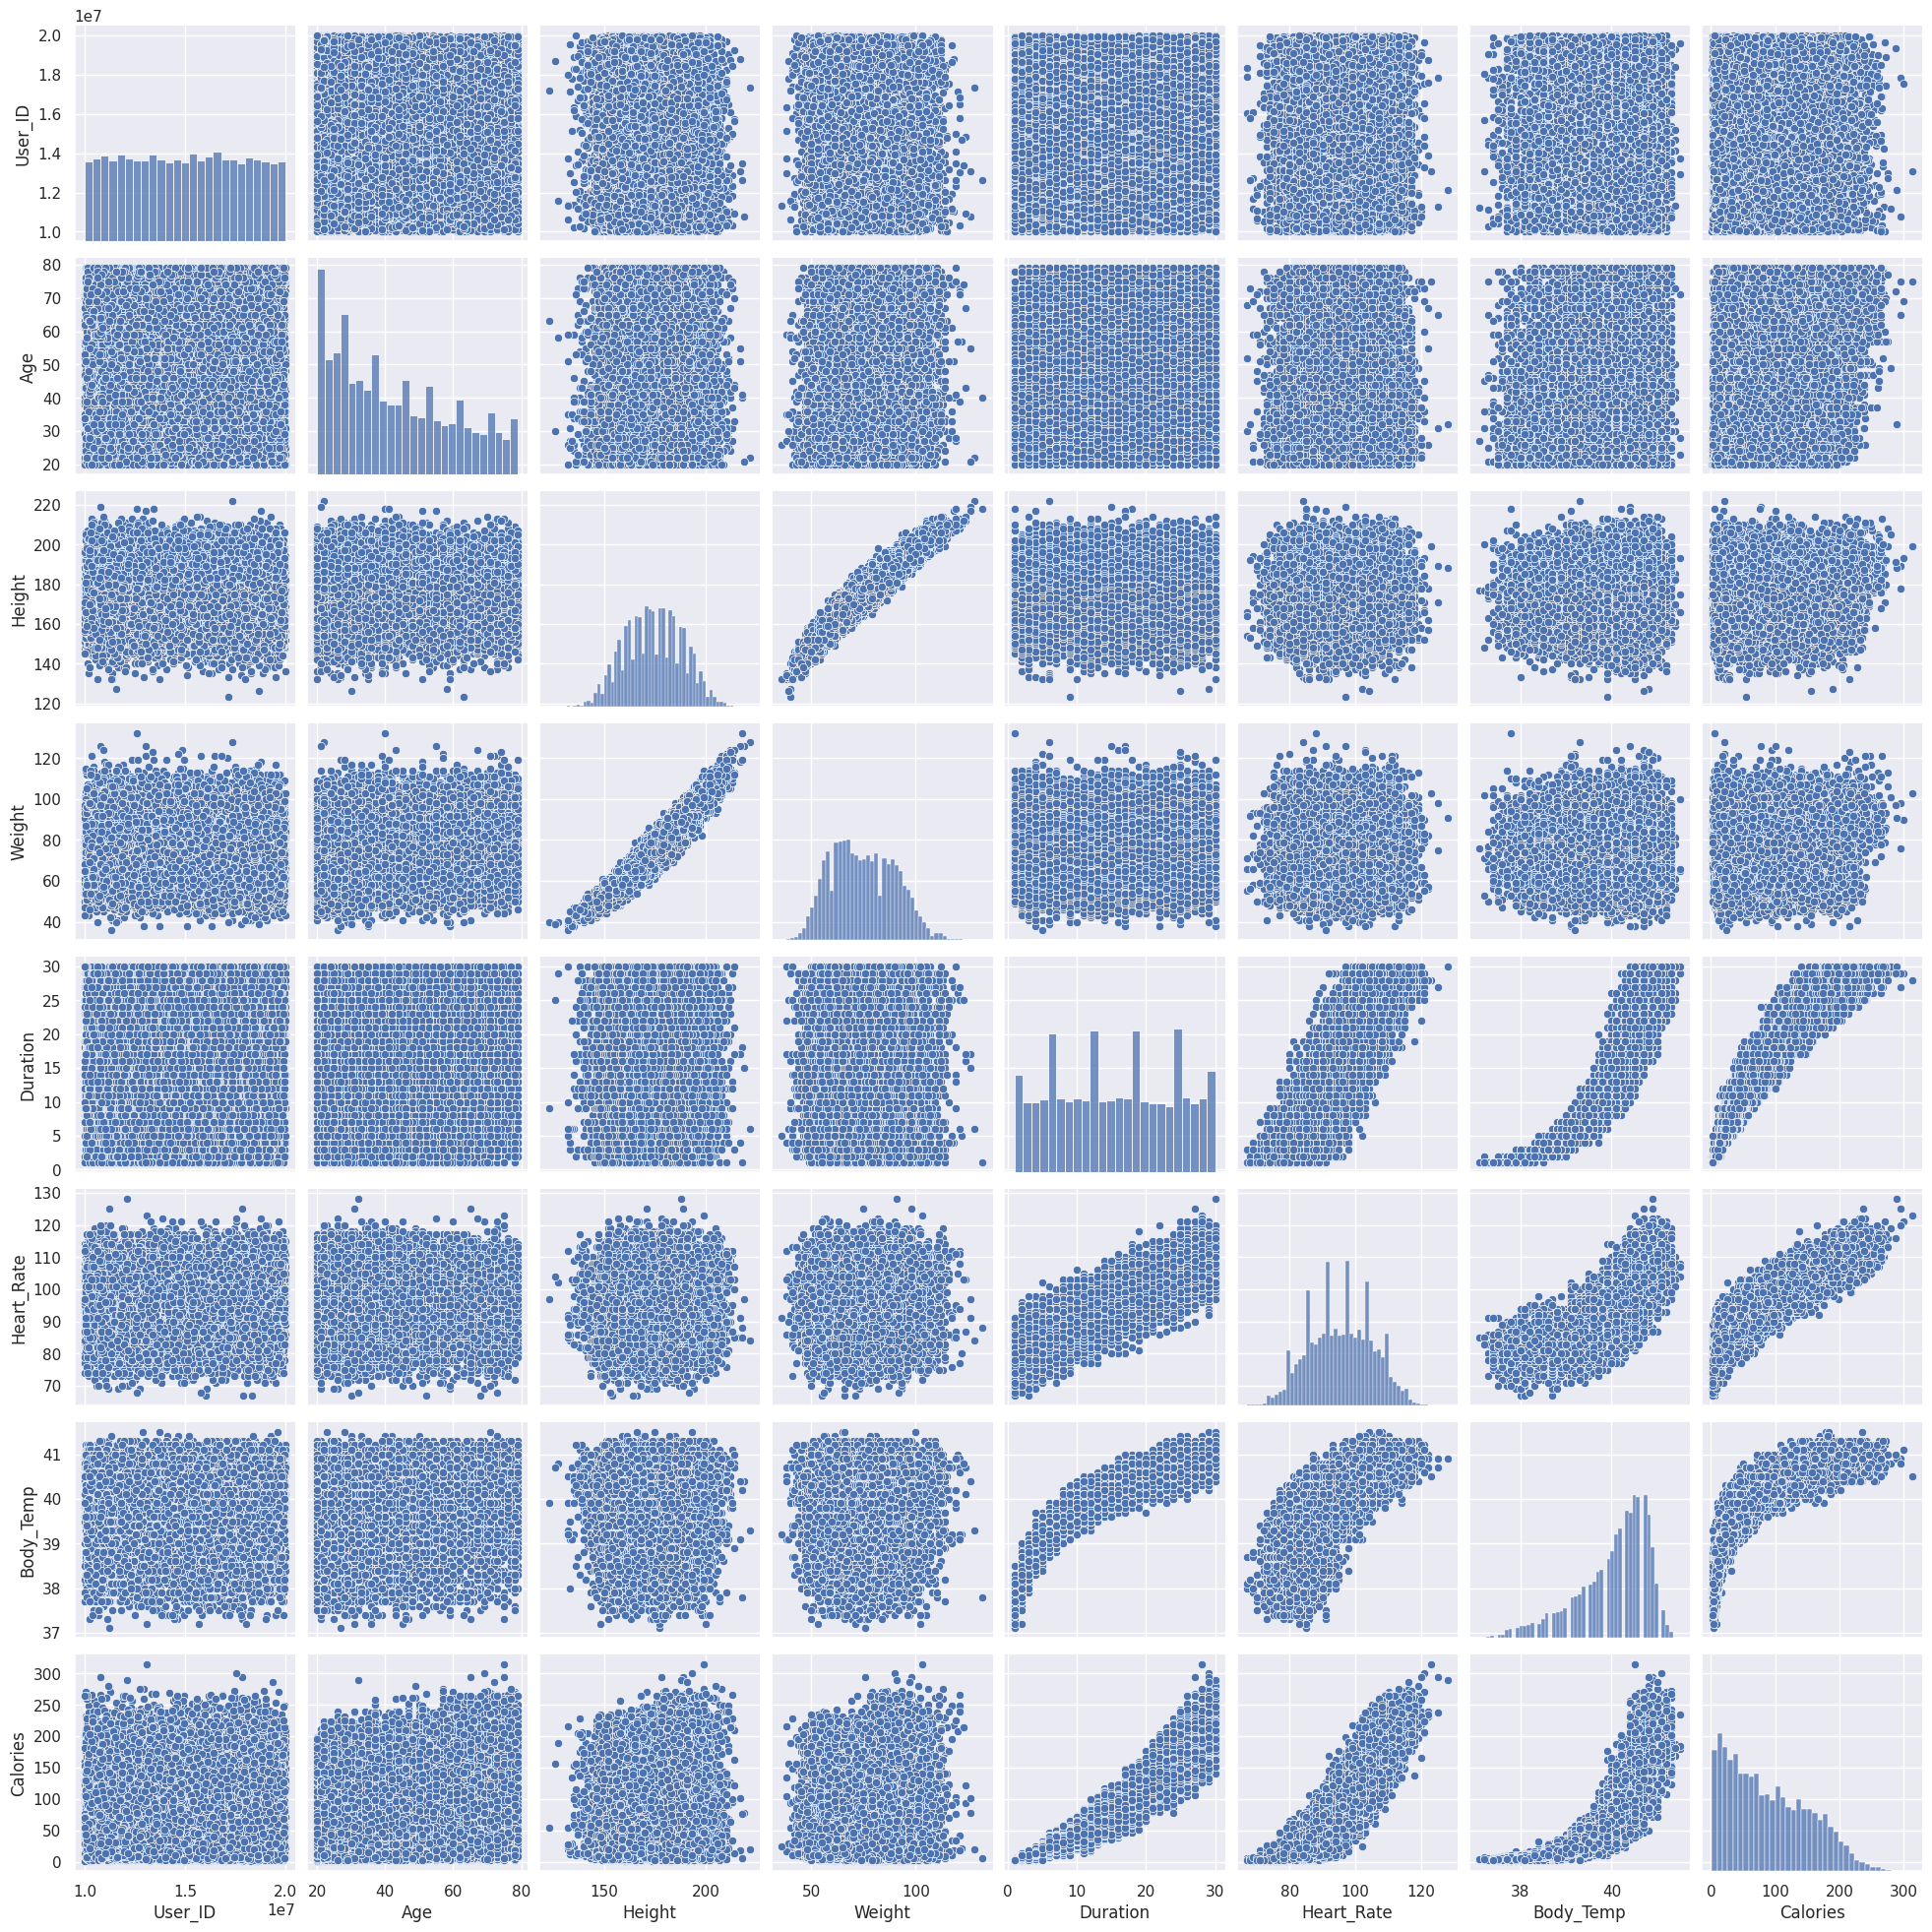

In [62]:
# relations between pairs of columns (visuals)
sns.pairplot(data)

In [63]:
# finding the Correlation
correlation = data.corr(numeric_only = True)
correlation

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

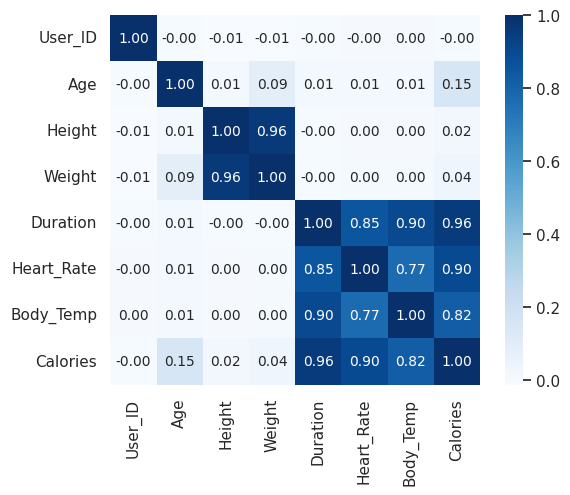

In [64]:
# build a heatmap
sns.heatmap(correlation, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size':10}, cmap='Blues')

**Converting text data to numerical**

In [65]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [66]:
# replace text in 'Gender' column to 'male'=0 ,'female'=1
data.replace({'Gender':{'male':0,'female':1}},inplace = True)

In [67]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


**Separate features and target variable**

In [68]:
# drop unnecessary column
data = data.drop(columns=['User_ID'])

In [69]:
# target column
target_variable = 'Calories'

# saparate the all the columns from the target column
X = data.drop(columns=[target_variable],axis=1)
y = data[target_variable]

In [70]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [71]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

**train-test split on the dataset**

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# split X,y to 80% train and 20% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((12000, 7), (3000, 7), (12000,), (3000,))

**Models Training & evaluation**

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, r2_score
import time


In [76]:
# models to train
Models = {
  'Decision Tree Regressor':DecisionTreeRegressor(),
  'Random Forest Regressor':RandomForestRegressor(),
  'XGBoost Regressor':XGBRegressor()
  }

In [77]:
# saving the prediction result for visualization
predict_outputs = []

# for each model
for name,model in Models.items():

  start = time.time()

  # train model using X_train & y_train
  model.fit(X_train,y_train)

  # model prediction on X_test
  y_test_prediction = model.predict(X_test)

  end = time.time()

  # save model name & its prediction results
  predict_outputs.append([name,y_test_prediction])

  # model score
  model_r2_score = r2_score(y_test,y_test_prediction)

  # model mean absolute error
  model_mae = mean_absolute_error(y_test, y_test_prediction)

  # print result
  print('Model Name: ', name)
  print('percentage of accuracy is: ', "%.4f" % (model_r2_score * 100), "%")
  print('Mean Absolute Error: ', model_mae)
  print('Time: ',end-start,'seconds \n')


Model Name:  Decision Tree Regressor
percentage of accuracy is:  99.3051 %
Mean Absolute Error:  3.416333333333333
Time:  0.23807787895202637 seconds 

Model Name:  Random Forest Regressor
percentage of accuracy is:  99.8224 %
Mean Absolute Error:  1.7018466666666663
Time:  4.472172975540161 seconds 

Model Name:  XGBoost Regressor
percentage of accuracy is:  99.8868 %
Mean Absolute Error:  1.4981198125282924
Time:  0.15957379341125488 seconds 



**visualize prediction**

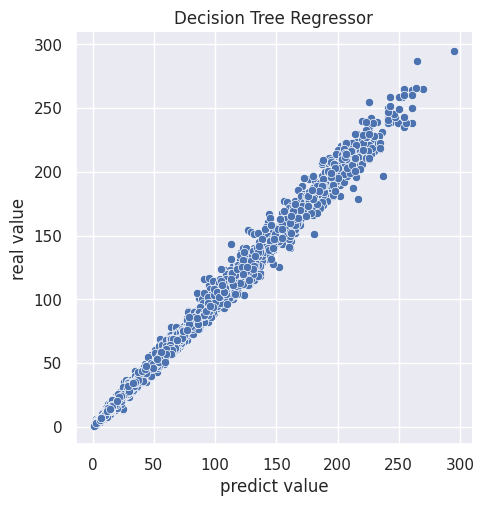

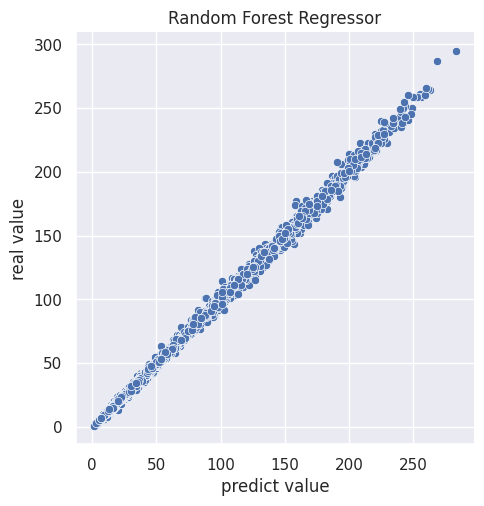

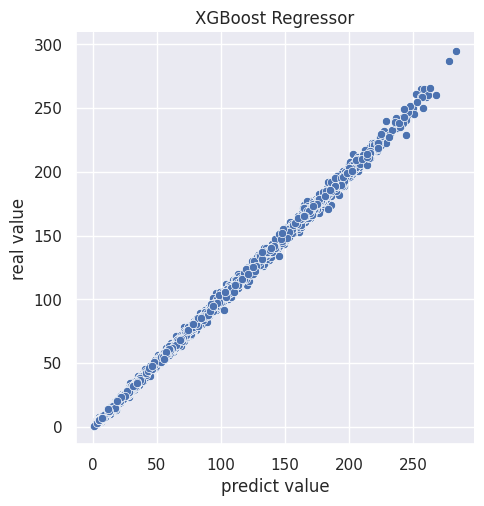

In [78]:
import matplotlib.pyplot as plt
for P_output in predict_outputs:
  model_results = pd.DataFrame({'predict value' : P_output[1],'real value':y_test})
  sns.relplot(model_results,x = 'predict value',y= 'real value' )
  plt.title(P_output[0])
  plt.show()

**sample prediction using the trained models**

In [79]:
from random import randint

# choose N test samples
N = 15
TenSamples = [randint(0,2999) for i in range(N)]

In [80]:
sampleData = X_test.iloc[TenSamples]
sampleData

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
3903,1,76,170.0,73.0,3.0,74.0,38.1
8649,1,41,166.0,66.0,22.0,93.0,40.9
2614,0,21,172.0,70.0,20.0,99.0,40.4
13301,1,73,160.0,59.0,9.0,87.0,39.7
5426,1,62,170.0,67.0,21.0,102.0,40.6
1323,1,27,157.0,54.0,17.0,95.0,40.3
33,1,42,165.0,68.0,22.0,93.0,40.8
14360,1,63,149.0,50.0,18.0,100.0,40.5
3106,0,45,200.0,97.0,27.0,102.0,40.8
6188,1,39,165.0,64.0,29.0,96.0,40.8


In [81]:
Real_Val = y_test.iloc[TenSamples].values
Real_Val

array([ 10., 107.,  86.,  44., 130.,  85., 107., 112., 175., 151., 101.,
        87., 165., 138.,  76.])

In [82]:
output = pd.DataFrame({'real value':Real_Val})

# for each model
for name,model in Models.items():

  # model prediction on sample
  prediction = model.predict(sampleData)
  output[name] = prediction

output

,real value,Decision Tree Regressor,Random Forest Regressor,XGBoost Regressor
0,10.0,10.0,10.49,9.222370
1,107.0,103.0,105.93,103.346275
2,86.0,91.0,88.94,83.743088
3,44.0,44.0,44.21,45.960701
4,130.0,133.0,132.24,130.147232
5,85.0,87.0,85.58,84.832497
6,107.0,103.0,105.37,104.957329
7,112.0,109.0,110.96,112.285431
8,175.0,186.0,177.50,184.159393
9,151.0,147.0,147.41,149.938110
